# Does Life Expectancy Depend on GDP?: A Study Taking WDI Data of India 

**Chandra Adhikari** 

June 21, 2020 

North Carolina, USA

### Objective:

**Study of the life expectancy at birth and GDP per capita in India.**

**Compare the  life expectancy in India trend with that of the USA.**

**Are there any correlation between the life expectancy and GDP per capita in India.**

**Data Source:** https://www.kaggle.com/worldbank/world-development-indicators

**Folder:** 'world-development-indicators'

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

### Initial exploration of the Dataset

In [2]:
df_indicator = pd.read_csv('./world-development-indicators/Indicators.csv') # load the data
df_indicator.shape # shape of the data

(5656458, 6)

In [3]:
df_indicator[:10] # display the first 10 rows

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


Country name and country code are the same, the year is also the same, but indicators are many. I would like to see on the  GDP per capita and the life expentancy. Try to see a few more rows to see more the IndicatorName.  

### Let us make sure we have the data of India:

In [4]:
df_indicator['CountryCode'].str.contains("IND").any()

True

In [5]:
df_indicator['CountryName'].str.contains("India").any()

True

### How many years of data do we have ?

In [6]:
# How many years of data do we have ?
years = df_indicator['Year'].unique().tolist()
len(years)

56

### What's the range of years?

In [7]:
print(min(years)," to ",max(years))

1960  to  2015


### Lets pick a country and an indicator to explore: Life expentancy

In [8]:
# select Life expectancy for India
hist_indicator = 'Life expectancy at birth, total \(years\)'
hist_country = 'IND'

m_LE = df_indicator['IndicatorName'].str.contains(hist_indicator) 
m_CC = df_indicator['CountryCode'].str.contains(hist_country)

# df_LE is just those indicators matching the USA for country code and Life expectancy at birth, total (years) over time.
df_LE= df_indicator[m_LE & m_CC]

In [9]:
df_LE.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11684,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,41.171951
36635,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,41.790488
64177,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1962,42.417415
92622,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,43.052732
121419,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1964,43.698415


### How life expectancy  have changed over time?

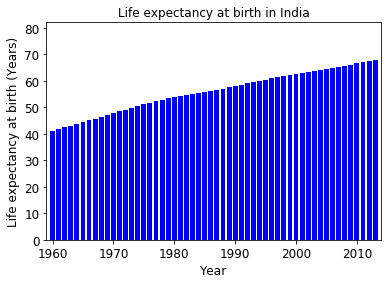

In [10]:
# get the years
years =df_LE['Year'].values
# get the values 
LifeExp = df_LE['Value'].values

# create
plt.xlabel('Year',size=12, color='k')
plt.ylabel('Life expectancy at birth (Years)',size=12, color='k')
plt.bar(years,LifeExp,color='b')
plt.xticks(fontsize=12,color='k')
plt.yticks(fontsize=12,color='k')
plt.title('Life expectancy at birth in India')
plt.axis([1959, 2014,0,82])
plt.show()

Turns out Life expectancy at birth have been consistently increaseing. From 1960 to 2014, the life expectancy increased consistently from about 40 to 70 years.

### How about life expectancy in USA? Does the USA have the same trend?

In [11]:
# select Life expectancy for the USA
hist_indicator_2 = 'Life expectancy at birth, total \(years\)'
hist_country_2 = 'USA'

m_LE_2 = df_indicator['IndicatorName'].str.contains(hist_indicator_2) 
m_CC_2 = df_indicator['CountryCode'].str.contains(hist_country_2)

# df_LE_2 is just those indicators matching the USA for country code and Life expectancy at birth, total (years) over time.
df_LE_2= df_indicator[m_LE_2 & m_CC_2]

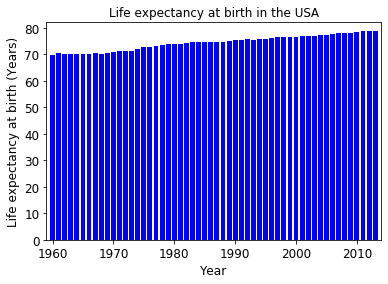

In [12]:
# get the years
years_2 =df_LE_2['Year'].values
# get the values 
LifeExp_2 = df_LE_2['Value'].values

# create
plt.xlabel('Year',size=12, color='k')
plt.ylabel('Life expectancy at birth (Years)',size=12, color='k')
plt.bar(years_2,LifeExp_2,color='b')
plt.xticks(fontsize=12,color='k')
plt.yticks(fontsize=12,color='k')
plt.title('Life expectancy at birth in the USA')
plt.axis([1959, 2014,0,82])
plt.show()

Yes, the life expectancy has increased over the year but the rate of increase in life ecpectancy is not as fast as in India. Indeed, it was about 70 years in the USA in 1960, which was only 40 years in India at that time.

### Let's get line plots in the same graph to make a comparision easy.

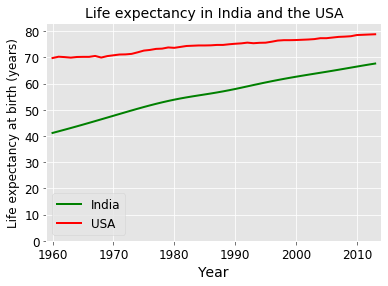

In [13]:
# switch to a line plot
style.use('ggplot')
plt.plot(df_LE['Year'].values, df_LE['Value'].values,'g',label="India", linewidth=2)
plt.plot(df_LE_2['Year'].values, df_LE_2['Value'].values,'r',label="USA", linewidth=2)


# Label the axes
plt.xlabel('Year',size=14,color='k')
#plt.ylabel(df_LE['IndicatorName'].iloc[0],size=12)
plt.ylabel('Life expectancy at birth (years)',size=12,color='k')

#label the figure
plt.title('Life expectancy in India and the USA', size=14,color='k')
plt.xticks(fontsize=12,color='k')
plt.yticks(fontsize=12,color='k')

#show legend
plt.legend(fontsize=12)
plt.grid(True, color='w')


# to make more honest, start they y axis at 0
plt.axis([1959, 2014,0,83])

plt.show()

## Relationship between Life expectancy and GDP per capita in India

In [14]:
# select GDP Per capita  for India
hist_indicator_G = 'GDP per capita \(constant 2005'
hist_country_G = 'IND'

mk_G1 = df_indicator['IndicatorName'].str.contains(hist_indicator_G) 
mk_G2 = df_indicator['CountryCode'].str.contains(hist_country_G)

gdp_India = df_indicator[mk_G1 & mk_G2]

#plot gdp_India vs df_LE

In [15]:
gdp_India.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11616,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,228.304470
36555,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,232.142053


In [16]:
df_LE.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11684,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,41.171951
36635,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,41.790488


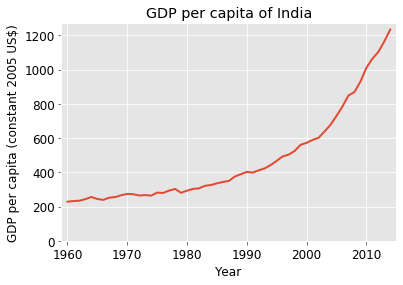

In [17]:
# switch to a line plot
plt.plot(gdp_India['Year'].values, gdp_India['Value'].values,linewidth=2)

# Label the axes
plt.xlabel('Year',fontsize=12,color='k')
plt.ylabel(gdp_India['IndicatorName'].iloc[0],fontsize=12,color='k')

#label the figure
plt.title('GDP per capita of India')
plt.xticks(fontsize=12,color='k')
plt.yticks(fontsize=12,color='k')

# to make more honest, start they y axis at 0
plt.axis([1959, 2015,0,1270])

plt.show()


GDP per capita increases with years.

### Draw a scatter plot to see corelation between GDP per capita and life expectancy.

In [18]:
gdp_India_Trunc = gdp_India[gdp_India['Year'] < 2014]
print(len(gdp_India_Trunc))
print(len(df_LE))

54
54


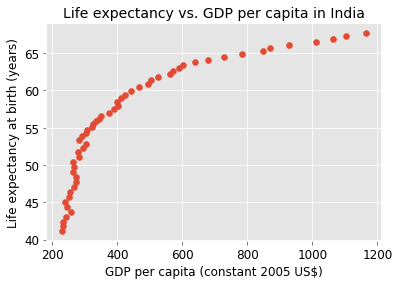

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Life expectancy vs. GDP per capita in India',fontsize=14, color='k')
axis.set_xlabel(gdp_India_Trunc['IndicatorName'].iloc[0],fontsize=12, color='k')
axis.set_ylabel('Life expectancy at birth (years)',color='k',fontsize=12)
plt.xticks(fontsize=12,color='k')
plt.yticks(fontsize=12,color='k')

X = gdp_India_Trunc['Value']
Y = df_LE['Value']


axis.scatter(X, Y)
plt.show()

This plot shows a good relationship. But how strong is it? We can test this by looking at correlation.

In [20]:
np.corrcoef(gdp_India_Trunc['Value'],df_LE['Value'])

array([[1.        , 0.84850089],
       [0.84850089, 1.        ]])

**The correlation of 0.85 is pretty strong.**

*We come to the End of the Jupiter notebook.* **Thank You!**